### The libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Raeading Data

In [85]:
Data= pd.read_csv("/home/learner/Desktop/Data Anlaysis/ImmoEliza-Analysis/Hussain - Cleaned_Data.csv")

In [95]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13615 entries, 0 to 13706
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   13615 non-null  int64 
 1   Locality             13615 non-null  object
 2   Type                 13615 non-null  object
 3   SubType              13615 non-null  object
 4   Sale_Type            13615 non-null  object
 5   Price                13615 non-null  int64 
 6   Bedrooms             13615 non-null  int64 
 7   Living_Area          13615 non-null  int64 
 8   Is_Equiped_Kitchen   13615 non-null  bool  
 9   Is_Furnished         13615 non-null  bool  
 10  Is_Open_Fire         13615 non-null  bool  
 11  Terrace              13615 non-null  bool  
 12  Terrace_Area         13615 non-null  int64 
 13  Garden               13615 non-null  bool  
 14  Garden_Area          13615 non-null  int64 
 15  Land_Surface         13615 non-null  int64 
 16  Surface o

In [94]:
Data.describe(include=['object', 'category'])

,Locality,Type,SubType,Sale_Type,State
count,13615,13615,13615,13615,13615
unique,838,3,35,1,7
top,Knokke,Apartment,apartment,Private,Good
freq,411,5954,4648,13615,4307


In [93]:
Data.Price.describe().astype(int)

count         13615
mean         552726
std        12880903
min               0
25%          225000
50%          325000
75%          480000
max      1500001600
Name: Price, dtype: int64

In [92]:
Data.drop_duplicates(inplace=True)

### Data Anlysis

How many rows and columns

In [98]:
Data.shape

(13615, 20)

#### Extreme Values

In [96]:
filtered_count = Data[(Data.Price < 1000000) & (Data.Price > 100000)].count()
Extreme =len(Data)-filtered_count
Extreme[0]

/tmp/ipykernel_29274/597016515.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Extreme[0]


2004

### Top ten localities in our data

Locality
Knokke       411
Antwerpen    393
Oudergem     338
Brussel      279
Gent         269
Ukkel        261
Oostende     251
Elsene       226
Aalst        215
Glain        160
dtype: int64

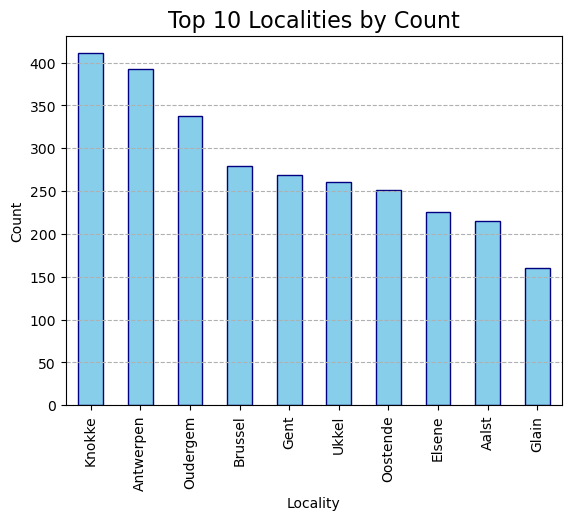

In [97]:
Top_localities= Data.groupby("Locality").size().sort_values(ascending=False).head(10)
Top_localities.plot(kind='bar', color='skyblue', edgecolor="navy")
###or index, value in enumerate(Top_localities):
   #### plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Localities by Count', fontsize=16)
plt.xlabel('Locality')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=1)
Top_localities

### Avg price per Locality

In [27]:
Data.groupby(["Locality","Type"])["Price"].mean().sort_values(ascending=False).head(10).astype(int).apply(lambda x: f'{x:,.0f}')

Locality             Type     
Lendelede            House        375,223,400
Barchon              House          7,823,850
Ans                  Apartment      5,400,000
Afsnee               Other          4,423,333
Arsimont             House          4,126,950
Deurle               Other          3,850,000
Gontrode             Other          3,113,366
Waasmunster          Other          3,000,000
Sint-Joost-ten-Node  House          2,637,500
Beerse               Other          2,450,000
Name: Price, dtype: object

### Avg Araea per Locality

In [47]:
filtered_data = Data[(Data["Type"] == "House") | (Data["Type"] == "Apartment")]
result = filtered_data.groupby(["Locality", "Type"])["Living_Area"].mean().sort_values(ascending=False).head(10).astype(int)
result

Locality               Type     
Sint-Joost-ten-Node    House        1681
Bergilers              Apartment    1363
Amblève                House         927
Vosselaar              House         739
Corbion                House         737
Amblève                Apartment     721
Houtave                House         719
Bellevaux-Ligneuville  House         681
Mont                   House         670
Baardegem              Apartment     640
Name: Living_Area, dtype: int64

### Percentege Furnasherd

In [51]:
filtered_data = Data[(Data["Type"] == "House") | (Data["Type"] == "Apartment")]
filtered_data.groupby("Is_Furnished").Id.count()

Is_Furnished
False    11036
True       341
Name: Id, dtype: int64